In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import random
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.metrics import r2_score

In [4]:
y = []
data_path=r'C:\Users\Rohit Varre\Desktop\Project Spidy'
categories=os.listdir(data_path)
for folder in categories:
    if folder == 'stress':
        folder_path=os.path.join(data_path,folder)
        data=os.listdir(folder_path)
        for dat in data:
            temp_path = os.path.join(folder_path,dat)
            temp = pd.read_csv(temp_path)
            temp = temp.iloc[7:1507]
            temp.drop('% Model', axis = 1,inplace= True)
            temp.columns = ['']
            y.append(temp.to_numpy())

In [5]:
X = pd.read_csv(temp_path)
X = X.iloc[7:1507]
X.drop('Untitled.mph',axis = 1, inplace = True)
X = np.array(X)
X = X.reshape(1,1500)
X = X.astype(np.float)
print(X.shape)
print(X)
X = X[0]

(1, 1500)
[[0.         0.00123188 0.00246376 ... 0.99907609 0.99938406 0.99969203]]


In [6]:
x = np.empty((1,1500))
categories=os.listdir(data_path)
for folder in categories:
    if folder == 'Curve Coordinates':
        folder_path=os.path.join(data_path,folder)
        data=os.listdir(folder_path)
        for dat in data:
            temp_path = os.path.join(folder_path,dat)
            temp = np.load(temp_path)
            temp.reshape(1500,-1)
            x = np.append(x,temp,axis = 0)
x = x[1:]

In [7]:
n = x.shape[0]
print(n)
x = np.array(x)
y = np.array(y)
x = x.astype(np.float)
y = y.astype(np.float)
y = y.reshape(-1,1500)
print(y.min(),y.max())

7856
51717.86062495772 42935207.31619579


In [8]:
scaler = RobustScaler()
y = scaler.fit_transform(y)
print(x.shape,y.shape)
print(x.min(),x.max())
print(y.min(),y.max())

(7856, 1500) (7856, 1500)
0.05034318662324705 1.9999
-0.5990909029673785 58.36777768718635


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6284, 1500)
(6284, 1500)
(1572, 1500)
(1572, 1500)


In [11]:
model = Sequential([
    
    Dense(units = 1500, input_shape = (1500,), activation = 'relu'),
    Dropout(0.2),
    Dense(units = 1500, activation = 'relu',kernel_regularizer = keras.regularizers.l2(0.05)),
    Dropout(0.2),
    Dense(units = 2000, activation = 'relu',kernel_regularizer = keras.regularizers.l2(0.05)),
    Dense(units = 2000, activation = 'relu',kernel_regularizer = keras.regularizers.l2(0.05)),
    Dense(units = 2500, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 1500, activation = 'relu'),
    Dense(units = 1500, activation = 'relu'),
    Dense(units = 1500)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1500)              2251500   
_________________________________________________________________
dropout (Dropout)            (None, 1500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              3002000   
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_4 (Dense)              (None, 2500)              5

In [12]:
model.compile(optimizer=SGD(learning_rate=0.02,momentum=0.9), loss='mean_squared_error', metrics = ['RootMeanSquaredError'])
history = model.fit(x=x_train,y=y_train,epochs=20,verbose=2,validation_split=0.2,batch_size=128)

Epoch 1/20
40/40 - 22s - loss: 169.7655 - root_mean_squared_error: 2.2951 - val_loss: 66.8559 - val_root_mean_squared_error: 1.9920
Epoch 2/20
40/40 - 22s - loss: 32.8801 - root_mean_squared_error: 2.2260 - val_loss: 11.8394 - val_root_mean_squared_error: 1.9720
Epoch 3/20
40/40 - 21s - loss: 8.3946 - root_mean_squared_error: 2.2261 - val_loss: 4.9044 - val_root_mean_squared_error: 1.9859
Epoch 4/20
40/40 - 21s - loss: 5.3593 - root_mean_squared_error: 2.2195 - val_loss: 4.0373 - val_root_mean_squared_error: 1.9758
Epoch 5/20
40/40 - 22s - loss: 5.0301 - root_mean_squared_error: 2.2271 - val_loss: 3.8990 - val_root_mean_squared_error: 1.9655
Epoch 6/20
40/40 - 21s - loss: 4.9310 - root_mean_squared_error: 2.2151 - val_loss: 3.8684 - val_root_mean_squared_error: 1.9625
Epoch 7/20
40/40 - 20s - loss: 4.9115 - root_mean_squared_error: 2.2139 - val_loss: 3.8460 - val_root_mean_squared_error: 1.9603
Epoch 8/20
40/40 - 23s - loss: 4.8985 - root_mean_squared_error: 2.2129 - val_loss: 3.8424 -

In [13]:
model.evaluate(x=x_test,y=y_test)
y_pred = model.predict(x_test)

50/50 [==============================] - 4s 72ms/step - loss: 4.8144 - root_mean_squared_error: 2.1942


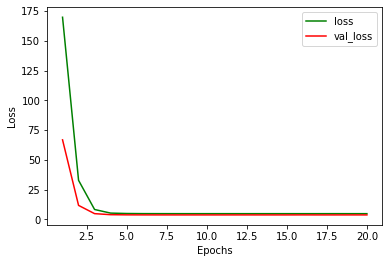

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
y_pred_1 = scaler.inverse_transform(y_pred)
y1_test_actual = scaler.inverse_transform(y_test)

[483, 621, 211, 1477, 811, 980, 317, 184, 136, 40, 822, 1125, 592, 1567, 120]


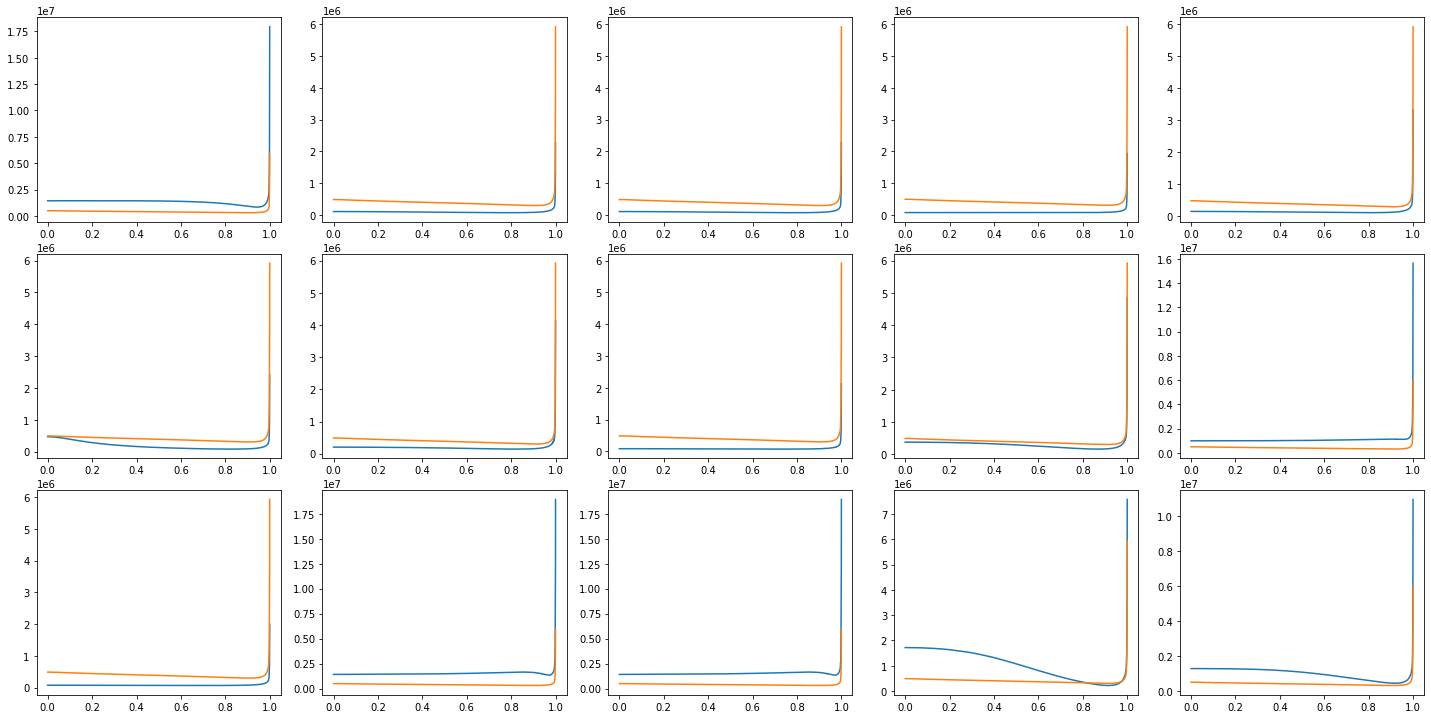

In [16]:
import random
fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (20,10))
plt.tight_layout()

random.seed(4)
n = random.sample(range(0, y1_test_actual.shape[0]), 15)

print(n)

ax[0,0].plot(X, y1_test_actual[n[0]])
ax[0,0].plot(X, y_pred_1[n[0]])
ax[0,1].plot(X, y1_test_actual[n[1]])
ax[0,1].plot(X, y_pred_1[n[1]])
ax[0,2].plot(X, y1_test_actual[n[1]])
ax[0,2].plot(X, y_pred_1[n[1]])
ax[0,3].plot(X, y1_test_actual[n[3]])
ax[0,3].plot(X, y_pred_1[n[3]])
ax[0,4].plot(X, y1_test_actual[n[4]])
ax[0,4].plot(X, y_pred_1[n[4]])
ax[1,0].plot(X, y1_test_actual[n[5]])
ax[1,0].plot(X, y_pred_1[n[5]])
ax[1,1].plot(X, y1_test_actual[n[6]])
ax[1,1].plot(X, y_pred_1[n[6]])
ax[1,2].plot(X, y1_test_actual[n[7]])
ax[1,2].plot(X, y_pred_1[n[7]])
ax[1,3].plot(X, y1_test_actual[n[8]])
ax[1,3].plot(X, y_pred_1[n[8]])
ax[1,4].plot(X, y1_test_actual[n[9]])
ax[1,4].plot(X, y_pred_1[n[9]])
ax[2,0].plot(X, y1_test_actual[n[10]])
ax[2,0].plot(X, y_pred_1[n[10]])
ax[2,1].plot(X, y1_test_actual[n[11]])
ax[2,1].plot(X, y_pred_1[n[11]])
ax[2,2].plot(X, y1_test_actual[n[11]])
ax[2,2].plot(X, y_pred_1[n[11]])
ax[2,3].plot(X, y1_test_actual[n[13]])
ax[2,3].plot(X, y_pred_1[n[13]])
ax[2,4].plot(X, y1_test_actual[n[14]])
ax[2,4].plot(X, y_pred_1[n[14]])

In [1]:
import matplotlib.pyplot as plt
k = 134
plt.plot(X,y_pred_1[k],'b',label='Predicted')
plt.plot(X,y1_test_actual[k],'r',label='Actual')
plt.xlabel('X')
plt.ylabel('Stress')
plt.legend()
plt.show()
print(y_pred_1)

NameError: name 'X' is not defined